In [1]:
from fuzzy_lib.draw import *
from fuzzy_lib.term import *
from fuzzy_lib.hedge import *
from fuzzy_lib.variable import *
from fuzzy_lib.activation import *
from fuzzy_lib.aggregation import *
from fuzzy_lib.accumulation import *
from fuzzy_lib.defuzzification import *

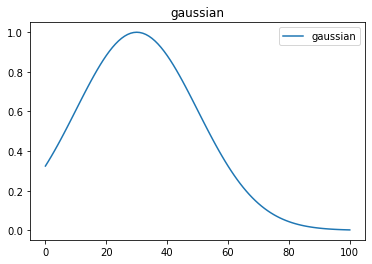

In [2]:
gaussian_term = Gaussian("gaussian", 0, 100, 30, 20)
print_term(gaussian_term)

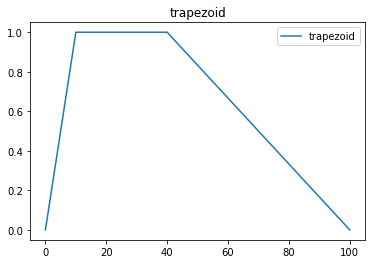

In [3]:
trapezoid_term = Trapezoid("trapezoid", 0, 100, 0, 10, 40, 100)
print_term(trapezoid_term)

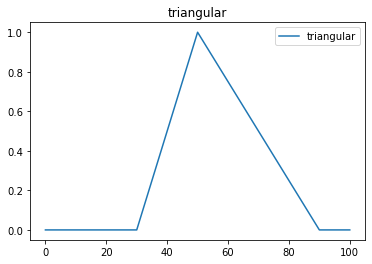

In [4]:
triangular_term = Triangular("triangular", 0, 100, 30, 50, 90)
print_term(triangular_term)

In [5]:
def get_thurst_variable() -> Variable:
    thurst = Variable("Thurst", 0, 300, MaxReceiver())

    thurst_low = Gaussian("Low", 0, 300, 0, 65)
    thurst.add_term(thurst_low.name, thurst_low)

    thurst_mid = Gaussian("Mid", 0, 300, 150, 65)
    thurst.add_term(thurst_mid.name, thurst_mid)

    thurst_high = Gaussian("High", 0, 300, 300, 65)
    thurst.add_term(thurst_high.name, thurst_high)

    return thurst

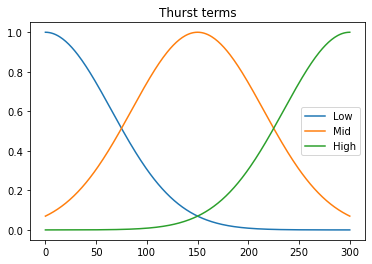

In [6]:
thurst = get_thurst_variable()
print_variable(thurst)

In [7]:
def get_health_variable():
    health = Variable("Health", 0, 150, MaxReceiver())
    
    health_low = Trapezoid("Low", health.lower_bound, health.upper_bound, 0, 0, 40, 70)
    health.add_term(health_low.name, health_low)
    
    health_enough = Trapezoid("Enough", health.lower_bound, health.upper_bound, 40, 70, 90, 100)
    health.add_term(health_enough.name, health_enough)
    
    health_many = Trapezoid("Many", health.lower_bound, health.upper_bound, 90, 110, 150, 150)
    health.add_term(health_many.name, health_many)
    
    return health

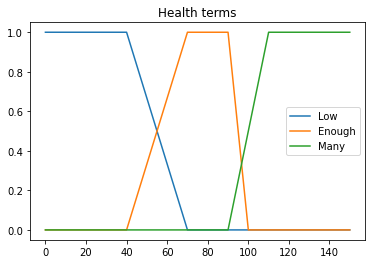

In [8]:
health = get_health_variable()
print_variable(health)

In [9]:
def get_danger_level_variable():
    danger = Variable("DangerLevel", 0, 1000, MaxReceiver())
    
    danger_high = SquareRoot("High", 0, 1000, 0, 1000)
    danger.add_term(danger_high.name, danger_high)
    
    danger_not_high = HedgeNot().compute(danger_high)
    danger.add_term(danger_not_high.name, danger_not_high)
    
    return danger

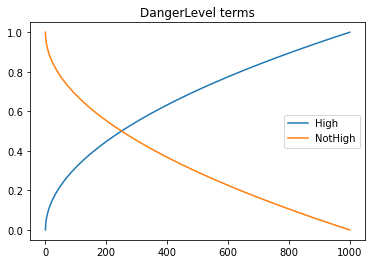

In [10]:
danger = get_danger_level_variable()
print_variable(danger)